## DATA COLLECTION

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
Life_data = pd.read_csv("E:\Flask\LifeExpectancyData.csv")

## Data Exploration

In [8]:
Life_data.shape

(2938, 22)

In [9]:
Life_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [10]:
Life_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Univariate Analysis

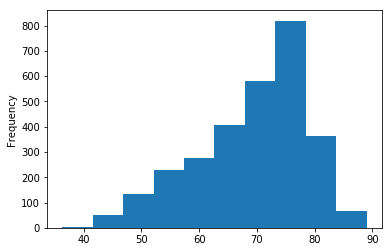

In [18]:
Life_data['Life expectancy '].plot.hist()

Life expectancy is most dense between 70 to 80 years of age.

In [13]:
Life_data['Status'].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

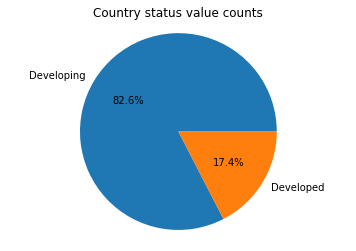

In [14]:
pie_chart_labels = 'Developing','Developed'
plt.pie(Life_data['Status'].value_counts(),labels = pie_chart_labels,autopct='%1.1f%%')
plt.title("Country status value counts")
plt.axis('equal')
plt.show()

Around 83% are developing countries while 17% are developed

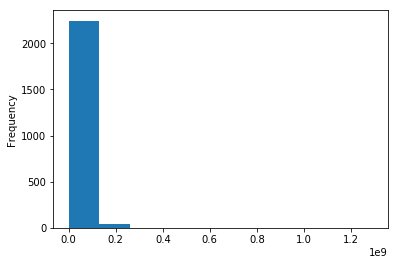

In [16]:
Life_data['Population'].plot.hist()

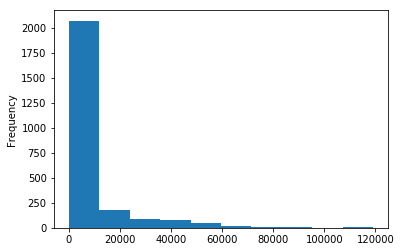

In [15]:
Life_data['GDP'].plot.hist()

Most countries have GDP below 20000 billion USD

## Bivariate Analysis

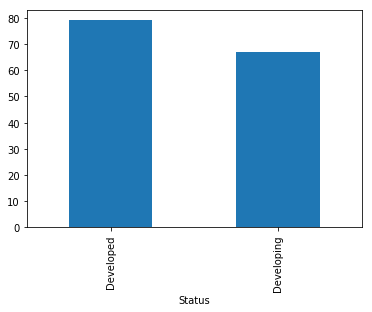

In [20]:
Life_data.groupby('Status')['Life expectancy '].mean().plot.bar()

Life expectancy of developed countries is higher than that of developing nations.

Text(0, 0.5, 'Life expectancy')

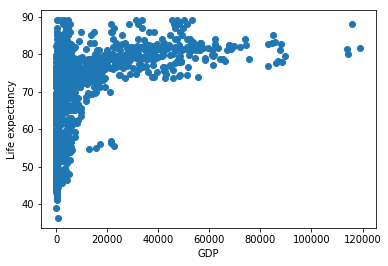

In [21]:
plt.scatter(Life_data['GDP'],Life_data['Life expectancy '])
plt.xlabel('GDP')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

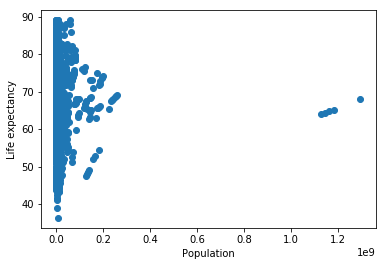

In [22]:
plt.scatter(Life_data['Population'],Life_data['Life expectancy '])
plt.xlabel('Population')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

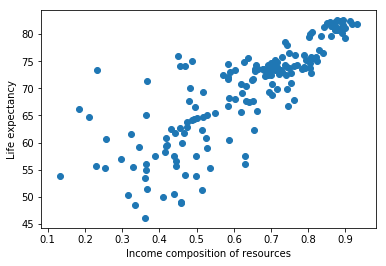

In [31]:
plt.scatter(Life_data['Income composition of resources'],Life_data['Life expectancy '])
plt.xlabel('Income composition of resources')
plt.ylabel('Life expectancy')

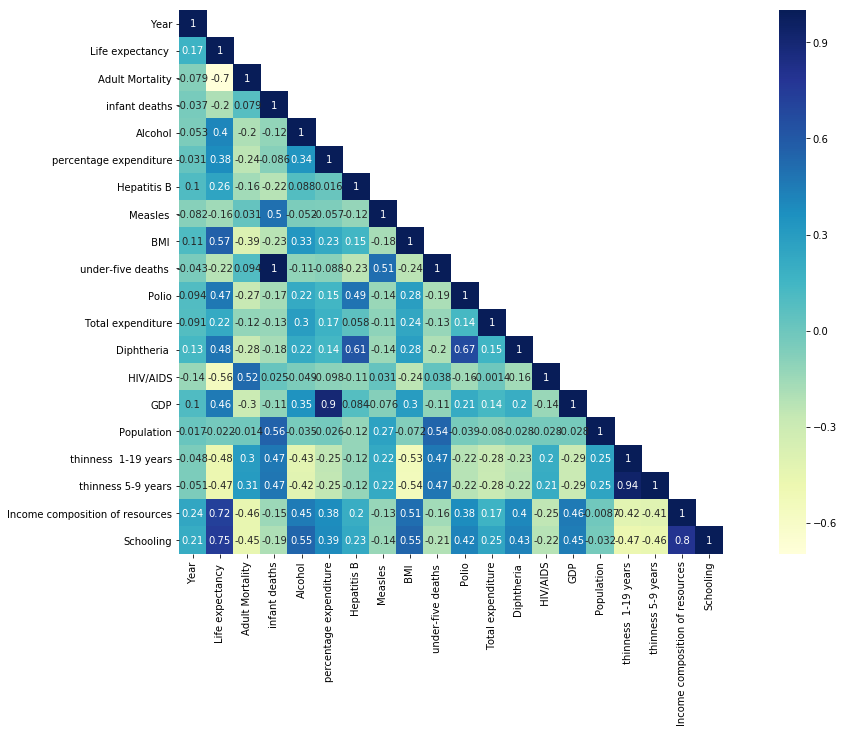

In [25]:
corr = Life_data.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask, square=True,annot=True, cmap="YlGnBu")

It is visible that income composition of resources and schooling are highly correlated with the life expectancy variable whereas Adult mortality and HIV/AIDS attribute are negetively correlated.

## Model Building

In [26]:
Life_data['status'] = pd.get_dummies(Life_data['Status'],drop_first = True)

In [27]:
Life_data = Life_data.drop(['Status'], axis=1)

In [28]:
Life_data = Life_data.groupby('Country').mean()

In [29]:
Life_data.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,status
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2007.5,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,...,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,1
Albania,2007.5,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,...,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,1
Algeria,2007.5,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,...,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,1
Angola,2007.5,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,...,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,1
Antigua and Barbuda,2007.5,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,...,4.791333,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375,1


In [32]:
Life_data = Life_data.drop(['Year'], axis=1)

In [33]:
data_x = Life_data.drop('Life expectancy ', axis = 1)
data_y = Life_data['Life expectancy ']

In [34]:
data_x.isnull().sum()

Adult Mortality                    10
infant deaths                       0
Alcohol                             2
percentage expenditure              0
Hepatitis B                         9
Measles                             0
 BMI                                4
under-five deaths                   0
Polio                               0
Total expenditure                   2
Diphtheria                          0
 HIV/AIDS                           0
GDP                                30
Population                         48
 thinness  1-19 years               4
 thinness 5-9 years                 4
Income composition of resources    17
Schooling                          13
status                              0
dtype: int64

In [35]:
data_x.fillna(data_x.mean(), inplace = True)

In [36]:
data_y.isnull().sum()

10

In [37]:
data_y.fillna(data_y.mean(), inplace=True)

In [38]:
from sklearn.model_selection import train_test_split
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data_x,data_y,train_size = 0.7, test_size=0.3)

## Random Forest Regression

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_fit = rf_model.fit(data_x_train,data_y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [40]:
from sklearn.model_selection import cross_val_score
rf_score = cross_val_score(rf_fit, data_x_train, data_y_train, cv = 5)

In [41]:
print("Mean cross validation score: %.2f" % np.mean(rf_score))

Mean cross validation score: 0.89


In [42]:
print("Score without cross validation: %.2f" % rf_fit.score(data_x_train,data_y_train))

Score without cross validation: 0.99


In [43]:
rf_predict = rf_fit.predict(data_x_test)

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
rf_r2 = r2_score(data_y_test, rf_predict)
print("R2 score: %.2f" % rf_r2 )

R2 score: 0.87


In [45]:
rf_model.score(data_x,data_y)

0.9501137079485176

## Grid search

In [46]:
from sklearn.metrics import make_scorer
grid_score = make_scorer(r2_score)

In [47]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(RandomForestRegressor(), param_grid = {'min_samples_split':range(2,10)}, scoring = grid_score, cv = 5, refit = True)

In [48]:
grid_cv.fit(data_x_train, data_y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(2, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(r2_score), verbose=0)

In [51]:
grid_cv.best_params_

{'min_samples_split': 3}

In [52]:
print('Best parameters: ' + str(grid_cv.best_params_))

Best parameters: {'min_samples_split': 3}


In [53]:
train_r2 = grid_cv.best_estimator_.score(data_x_train,data_y_train)
print("R2 score on training data " + str(train_r2))

R2 score on training data 0.9854897467990035


In [54]:
test_r2 = r2_score(data_y_test, grid_cv.best_estimator_.predict(data_x_test))
print("R2 score on training data " + str(test_r2))

R2 score on training data 0.8835890216427544


In [55]:
MAE = mean_absolute_error(data_y_test, rf_predict)
print("Mean absolute error" + str(MAE))

Mean absolute error2.369871749576032


In [56]:
MSE = mean_squared_error(data_y_test, rf_predict)
print("Mean squared error: " + str(MSE))

Mean squared error: 11.099526376883944


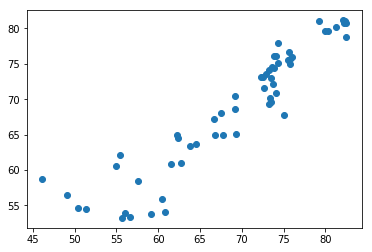

In [57]:
plt.scatter(data_y_test,rf_predict)

In [58]:
df=pd.DataFrame({'Actual':data_y_test, 'Predicted':rf_predict})

In [59]:
df1 = df.head(10)
print(df1)

                 Actual  Predicted
Country                           
San Marino    69.224932  68.653105
France        82.218750  80.781875
Tajikistan    66.656250  67.225611
Bangladesh    69.300000  65.032500
Israel        81.300000  80.210000
Libya         72.487500  73.115000
Mali          54.937500  60.610625
Sierra Leone  46.112500  58.716250
Peru          73.662500  74.513125
Pakistan      64.500000  63.695625


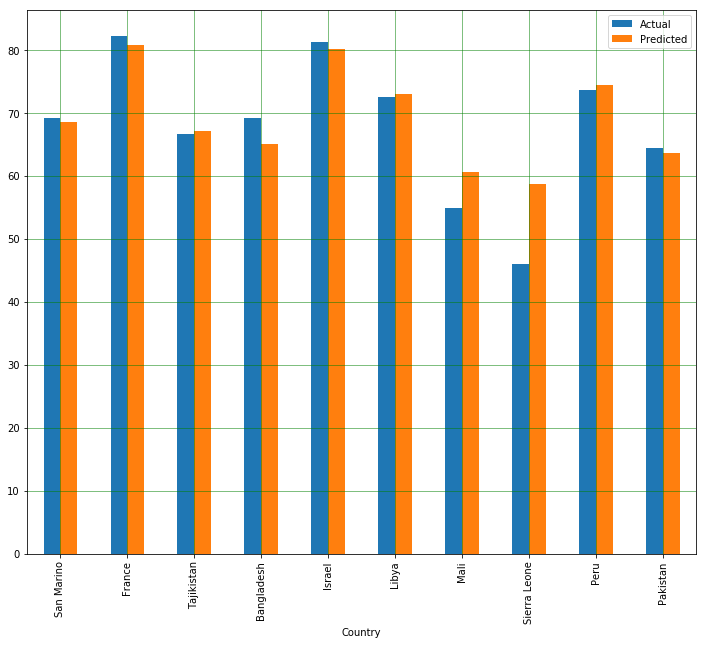

In [60]:
df1.plot(kind='bar',figsize=(12,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()